In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats
import sys
import os

In [83]:
#read the data sets
csv_path = "Resources/data.csv"
music_df = pd.read_csv(csv_path)

In [84]:
csv_path = "Resources/data_w_genres.csv"
genre_df = pd.read_csv(csv_path)

In [85]:
#checking if a random artist is on both data sets
genre_df.loc[(genre_df["artists"] == "Louis Armstrong")]

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
15222,"['adult standards', 'dixieland', 'harlem renai...",Louis Armstrong,0.790156,0.547011,230558.994728,0.289108,0.088578,0.273495,-12.883371,0.098098,111.638654,0.531922,20.652021,0,1,569


In [86]:
#clean the "artists" column in order to merge the two data sets for further analysis
spec_chars = ["[","]",'"',"'"]
for char in spec_chars:
    music_df['artists'] = music_df['artists'].str.replace(char, '')

In [87]:
#strip the leading and trailing whitespaces and remove the blank values from the genre data frame before the merge
genre_df["genres"] = genre_df["genres"].str.strip().replace("[]", 'DROP') #rename the names of the rows I want to drop
tracksToDropIndex = genre_df[genre_df["genres"] == "DROP"].index #get the row indexes of the rows to drop

genre_df.drop(tracksToDropIndex, inplace = True) #drop these row indexes from data frame 
genre_df #display the cleaned data frame to ensure no blank genres

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
8,"['comedy rock', 'comic', 'parody']","""Weird Al"" Yankovic",0.173145,0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122
9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",$NOT,0.544467,0.789800,137910.466667,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15
10,"['dark trap', 'meme rap']",$atori Zoom,0.239000,0.883000,141519.000000,0.625000,0.000000,0.076500,-4.098000,0.245000,126.677000,0.871000,67.000000,6,1,2
12,"['asian american hip hop', 'cali rap', 'west c...",$tupid Young,0.148100,0.854000,190572.000000,0.683000,0.000002,0.188500,-6.997000,0.221000,100.724500,0.625500,57.500000,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28667,['classic cantopop'],陳麗斯,0.562000,0.550000,195013.000000,0.375000,0.000004,0.244000,-12.277000,0.033200,75.703000,0.405000,33.000000,0,1,2
28673,"['c-pop', 'classic mandopop', 'vintage chinese...",鳳飛飛,0.884000,0.358000,259387.000000,0.208000,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,1,2


In [88]:
merge_genre = music_df.merge(genre_df,on=["artists"],how = "inner")
merge_genre

,valence_x,year,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,...,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count
0,0.4060,1921,0.9960,John McCormack,0.518,159507,0.20300,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,...,0.000011,0.107400,-13.036000,0.060380,115.056600,0.287200,1.60000,7,1,5
1,0.1920,1921,0.9930,John McCormack,0.393,255800,0.15600,0,3Po8aZhKXPvBlWZFevIrI5,0.000005,...,0.000011,0.107400,-13.036000,0.060380,115.056600,0.287200,1.60000,7,1,5
2,0.0731,1921,0.9930,Sergei Rachmaninoff,0.389,218773,0.08800,0,02GDntOXexBFUvSgaXLPkd,0.527000,...,0.793356,0.236443,-20.485082,0.041968,95.200198,0.264284,4.33209,2,1,268
3,0.0731,1921,0.9930,Sergei Rachmaninoff,0.389,218773,0.08800,0,0eQsdik7GTEy7M3UytCbSN,0.527000,...,0.793356,0.236443,-20.485082,0.041968,95.200198,0.264284,4.33209,2,1,268
4,0.0487,1979,0.9920,Sergei Rachmaninoff,0.519,223600,0.06560,0,3rd1Chqzxr95fcyBaJl0JZ,0.893000,...,0.793356,0.236443,-20.485082,0.041968,95.200198,0.264284,4.33209,2,1,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120871,0.8240,2020,0.1260,PawPaw Rod,0.780,165499,0.72100,0,63e35wfL6GMUp0boIvNBhw,0.002350,...,0.002350,0.078000,-6.371000,0.214000,178.036000,0.824000,65.00000,6,1,2
120872,0.5570,2020,0.0937,Nueva Conducta,0.687,149603,0.84700,1,4X9r5jOEmvl5Qr3ozFwTww,0.000000,...,0.000000,0.028800,-7.593000,0.054300,110.156000,0.557000,63.00000,7,0,2
120873,0.7050,2020,0.1130,Tyler Rich,0.535,186973,0.74900,0,1zQjzfgYp0ZDSsU1dxi5g8,0.000000,...,0.000000,0.108000,-5.344000,0.052500,169.778000,0.705000,64.00000,9,1,2
120874,0.0495,2020,0.9930,Clyde Boudreaux,0.133,151750,0.00512,0,0kKOC50fPTnqmrYvtJInsT,0.851000,...,0.851000,0.095400,-33.295000,0.038000,67.818000,0.049500,70.00000,9,1,2


In [89]:
# Create dataframe with only necesary columns
year_df = merge_genre[["year","name","artists","popularity_x","genres"]]
year_df.head()

,year,name,artists,popularity_x,genres
0,1921,The Wearing of the Green,John McCormack,4,"['irish ballad', 'vintage classical singing']"
1,1921,Kathleen Mavourneen,John McCormack,0,"['irish ballad', 'vintage classical singing']"
2,1921,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",Sergei Rachmaninoff,2,"['classical', 'post-romantic era', 'russian ro..."
3,1921,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",Sergei Rachmaninoff,0,"['classical', 'post-romantic era', 'russian ro..."
4,1979,"Prélude in C sharp minor, Op.3, No.2",Sergei Rachmaninoff,41,"['classical', 'post-romantic era', 'russian ro..."


In [90]:
#group by & find the max

In [91]:
#groupby years
max_popularity = year_df.groupby(["year"])["popularity_x"].max()
max_popularity = max_popularity.reset_index()

popular_by_year = max_popularity.merge(year_df,on=["year","popularity_x"],how = "left")
popular_by_year

,year,popularity_x,name,artists,genres
0,1921,4,The Wearing of the Green,John McCormack,"['irish ballad', 'vintage classical singing']"
1,1922,6,Carve,Uli,"['corrido', 'nuevo regional mexicano', 'region..."
2,1923,42,Nobody Knows You When You're Down and Out,Bessie Smith,"['blues', 'harlem renaissance', 'jazz blues', ..."
3,1924,1,(What Did I Do to Be So) Black and Blue,Louis Armstrong,"['adult standards', 'dixieland', 'harlem renai..."
4,1925,37,"On the Sunny Side of the Street (From ""Is Ever...",Tommy Dorsey,"['adult standards', 'big band', 'easy listenin..."
...,...,...,...,...,...
104,2017,87,Believer,Imagine Dragons,"['modern rock', 'pop', 'rock']"
105,2017,87,Jocelyn Flores,XXXTENTACION,"['emo rap', 'miami hip hop']"
106,2018,89,Lucid Dreams,Juice WRLD,"['chicago rap', 'melodic rap']"
107,2019,94,Watermelon Sugar,Harry Styles,"['pop', 'post-teen pop']"


In [92]:
#use loc function to find the top ten in each decate
decade_1 = year_df.loc[(year_df["year"]>=1921)&(year_df["year"]<=1930)]
top_ten_1 = decade_1.sort_values("popularity_x",ascending = False)
top_ten_1 = top_ten_1.head(10)
top_ten_1

,year,name,artists,popularity_x,genres
886,1929,Mack the Knife,Louis Armstrong,52,"['adult standards', 'dixieland', 'harlem renai..."
3527,1928,"Sing, Sing, Sing",Benny Goodman,51,"['adult standards', 'bebop', 'big band', 'jazz..."
2963,1926,Ain't Misbehavin',Fats Waller,49,"['adult standards', 'bebop', 'dixieland', 'har..."
3626,1928,"Dark Was the Night, Cold Was the Ground",Blind Willie Johnson,47,"['acoustic blues', 'appalachian folk', 'blues'..."
2964,1926,Two Sleepy People,Fats Waller,45,"['adult standards', 'bebop', 'dixieland', 'har..."
3627,1928,It's Nobody's Fault but Mine,Blind Willie Johnson,42,"['acoustic blues', 'appalachian folk', 'blues'..."
822,1923,Nobody Knows You When You're Down and Out,Bessie Smith,42,"['blues', 'harlem renaissance', 'jazz blues', ..."
3063,1927,Singin' The Blues,Bix Beiderbecke,41,"['big band', 'dixieland', 'jazz trumpet', 'rag..."
2759,1925,"On the Sunny Side of the Street (From ""Is Ever...",Tommy Dorsey,37,"['adult standards', 'big band', 'easy listenin..."
887,1929,I Can't Believe That You're In Love With Me,Louis Armstrong,37,"['adult standards', 'dixieland', 'harlem renai..."


In [93]:
decade_2 = year_df.loc[(year_df["year"]>=1931)&(year_df["year"]<=1940)]
top_ten_2 = decade_2.sort_values("popularity_x",ascending = False)
top_ten_2 = top_ten_2.head(10)
top_ten_2

,year,name,artists,popularity_x,genres
7057,1939,"It's Been a Long, Long Time",Harry James,60,"['adult standards', 'big band', 'jazz trumpet'..."
5839,1939,Moonlight Serenade,Glenn Miller,54,"['adult standards', 'big band', 'easy listenin..."
6509,1937,Cross Road Blues,Robert Johnson,54,"['acoustic blues', 'blues', 'blues rock', 'del..."
5218,1933,Tea for Two,Art Tatum,53,"['bebop', 'big band', 'contemporary post-bop',..."
5848,1939,In the Mood - Live,Glenn Miller,52,"['adult standards', 'big band', 'easy listenin..."
5241,1933,Summertime,Billie Holiday,52,"['adult standards', 'harlem renaissance', 'jaz..."
5920,1939,Where Did You Sleep Last Night,Lead Belly,52,"['acoustic blues', 'appalachian folk', 'blues'..."
5840,1939,In the Mood,Glenn Miller,51,"['adult standards', 'big band', 'easy listenin..."
4925,1935,Cheek to Cheek,Fred Astaire,49,"['adult standards', 'big band', 'lounge', 'swi..."
5242,1933,The Man I Love,Billie Holiday,47,"['adult standards', 'harlem renaissance', 'jaz..."


In [94]:
decade_3 = year_df.loc[(year_df["year"]>=1941)&(year_df["year"]<=1950)]
top_ten_3 = decade_3.sort_values("popularity_x",ascending = False)
top_ten_3 = top_ten_3.head(10)
top_ten_3

,year,name,artists,popularity_x,genres
2858,1945,It's Beginning To Look Like Christmas,Bing Crosby,71,"['adult standards', 'easy listening']"
8124,1947,Here Comes Santa Claus (Right Down Santa Claus...,Gene Autry,70,"['adult standards', 'cowboy western', 'oklahom..."
8955,1944,Have Yourself A Merry Little Christmas,Judy Garland,70,"['adult standards', 'hollywood', 'lounge', 'to..."
2859,1945,I'll Be Home For Christmas,Bing Crosby,66,"['adult standards', 'easy listening']"
2860,1945,God Rest Ye Merry Gentlemen,Bing Crosby,64,"['adult standards', 'easy listening']"
8125,1947,Rudolph the Red-Nosed Reindeer,Gene Autry,61,"['adult standards', 'cowboy western', 'oklahom..."
9187,1944,Saturday Night (Is The Loneliest Night In The ...,Frank Sinatra,57,"['adult standards', 'easy listening', 'lounge']"
9186,1944,Nancy (With the Laughing Face) - 78rpm Version,Frank Sinatra,57,"['adult standards', 'easy listening', 'lounge']"
9169,1943,Someone to Watch Over Me,Frank Sinatra,57,"['adult standards', 'easy listening', 'lounge']"
3070,1950,Someone To Watch Over Me,Ella Fitzgerald,56,"['adult standards', 'jazz blues', 'swing', 'vo..."


In [95]:
decade_4 = year_df.loc[(year_df["year"]>=1951)&(year_df["year"]<=1960)]
top_ten_4 = decade_4.sort_values("popularity_x",ascending = False)
top_ten_4 = top_ten_4.head(10)
top_ten_4

,year,name,artists,popularity_x,genres
14867,1959,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,81,"['adult standards', 'easy listening', 'lounge'..."
23983,1960,At Last,Etta James,76,"['adult standards', 'jazz blues', 'soul', 'sou..."
20959,1959,Johnny B. Goode,Chuck Berry,75,"['blues rock', 'classic rock', 'rock', 'rock-a..."
19474,1957,Blue Christmas,Elvis Presley,74,"['rock-and-roll', 'rockabilly']"
19487,1958,Jailhouse Rock,Elvis Presley,73,"['rock-and-roll', 'rockabilly']"
9294,1958,Come Fly With Me - Remastered,Frank Sinatra,70,"['adult standards', 'easy listening', 'lounge']"
14869,1959,Rudolph The Red-Nosed Reindeer,Dean Martin,70,"['adult standards', 'easy listening', 'lounge'..."
23984,1960,A Sunday Kind Of Love,Etta James,70,"['adult standards', 'jazz blues', 'soul', 'sou..."
21744,1958,My Baby Just Cares for Me - 2013 Remastered Ve...,Nina Simone,69,"['jazz blues', 'soul', 'soul jazz', 'torch son..."
7648,1959,Big Iron,Marty Robbins,69,"['cowboy western', 'nashville sound']"


In [96]:
decade_5 = year_df.loc[(year_df["year"]>=1961)&(year_df["year"]<=1970)]
top_ten_5 = decade_5.sort_values("popularity_x",ascending = False)
top_ten_5 = top_ten_5.head(10)
top_ten_5

,year,name,artists,popularity_x,genres
24255,1964,Rockin' Around The Christmas Tree,Brenda Lee,85,"['adult standards', 'brill building pop']"
12073,1963,It's the Most Wonderful Time of the Year,Andy Williams,83,"['adult standards', 'brill building pop', 'eas..."
27878,1969,Here Comes The Sun - Remastered 2009,The Beatles,82,"['beatlesque', 'british invasion', 'classic ro..."
35205,1969,Fortunate Son,Creedence Clearwater Revival,81,"['album rock', 'classic rock', 'country rock',..."
27704,1963,Sleigh Ride,The Ronettes,80,"['brill building pop', 'classic girl group', '..."
29568,1965,My Girl,The Temptations,79,"['brill building pop', 'classic soul', 'funk',..."
27879,1969,Come Together - Remastered 2009,The Beatles,79,"['beatlesque', 'british invasion', 'classic ro..."
33171,1967,Brown Eyed Girl,Van Morrison,79,"['classic rock', 'folk', 'folk rock', 'mellow ..."
31765,1966,California Dreamin' - Single Version,The Mamas & The Papas,79,"['brill building pop', 'bubblegum pop', 'class..."
19514,1961,Can't Help Falling in Love,Elvis Presley,78,"['rock-and-roll', 'rockabilly']"


In [97]:
decade_6 = year_df.loc[(year_df["year"]>=1971)&(year_df["year"]<=1980)]
top_ten_6 = decade_6.sort_values("popularity_x",ascending = False)
top_ten_6 = top_ten_6.head(10)
top_ten_6

,year,name,artists,popularity_x,genres
37339,1977,Dreams - 2004 Remaster,Fleetwood Mac,89,"['album rock', 'classic rock', 'mellow gold', ..."
48887,1979,Highway to Hell,AC/DC,84,"['album rock', 'australian rock', 'hard rock',..."
48894,1980,Back In Black,AC/DC,84,"['album rock', 'australian rock', 'hard rock',..."
42121,1976,Hotel California - 2013 Remaster,Eagles,83,"['album rock', 'classic rock', 'country rock',..."
44216,1974,Sweet Home Alabama,Lynyrd Skynyrd,82,"['album rock', 'blues rock', 'classic rock', '..."
37340,1977,The Chain - 2004 Remaster,Fleetwood Mac,82,"['album rock', 'classic rock', 'mellow gold', ..."
38955,1972,"Rocket Man (I Think It's Going To Be A Long, L...",Elton John,82,"['glam rock', 'mellow gold', 'piano rock', 'so..."
43024,1977,Mr. Blue Sky,Electric Light Orchestra,81,"['album rock', 'art rock', 'beatlesque', 'bow ..."
37331,1975,Landslide,Fleetwood Mac,80,"['album rock', 'classic rock', 'mellow gold', ..."
48895,1980,You Shook Me All Night Long,AC/DC,80,"['album rock', 'australian rock', 'hard rock',..."


In [98]:
decade_7 = year_df.loc[(year_df["year"]>=1981)&(year_df["year"]<=1990)]
top_ten_7 = decade_7.sort_values("popularity_x",ascending = False)
top_ten_7 = top_ten_7.head(10)
top_ten_7

,year,name,artists,popularity_x,genres
51508,1983,Every Breath You Take,The Police,84,"['album rock', 'art rock', 'classic rock', 'da..."
60659,1985,Take on Me,a-ha,84,"['album rock', 'classic rock', 'folk rock', 'm..."
48912,1990,Thunderstruck,AC/DC,83,"['album rock', 'australian rock', 'hard rock',..."
51562,1982,Africa,TOTO,83,"['album rock', 'classic rock', 'mellow gold', ..."
59654,1986,Livin' On A Prayer,Bon Jovi,83,"['glam metal', 'rock']"
43452,1982,Billie Jean,Michael Jackson,83,"['pop', 'r&b', 'soul']"
58391,1985,Everybody Wants To Rule The World,Tears For Fears,82,"['dance rock', 'new romantic', 'new wave', 'ne..."
58712,1984,Summer Of '69,Bryan Adams,82,"['album rock', 'canadian pop', 'canadian singe..."
60759,1987,I Wanna Dance with Somebody (Who Loves Me),Whitney Houston,82,"['dance pop', 'pop', 'urban contemporary']"
51769,1981,Don't Stop Believin',Journey,81,"['album rock', 'classic rock', 'hard rock', 'm..."


In [99]:
decade_8 = year_df.loc[(year_df["year"]>=1991)&(year_df["year"]<=2000)]
top_ten_8 = decade_8.sort_values("popularity_x",ascending = False)
top_ten_8 = top_ten_8.head(10)
top_ten_8

,year,name,artists,popularity_x,genres
66193,1994,All I Want for Christmas Is You,Mariah Carey,88,"['dance pop', 'pop', 'r&b', 'urban contemporary']"
76264,2000,In the End,Linkin Park,84,"['alternative metal', 'nu metal', 'post-grunge..."
76192,2000,Yellow,Coldplay,84,"['permanent wave', 'pop']"
68670,1993,Creep,Radiohead,82,"['alternative rock', 'art rock', 'melancholia'..."
59191,1991,Losing My Religion,R.E.M.,82,"['alternative rock', 'classic rock', 'permanen..."
68859,1994,Zombie,The Cranberries,81,"['irish rock', 'pop rock']"
64482,1999,Californication,Red Hot Chili Peppers,81,"['alternative rock', 'funk metal', 'funk rock'..."
64475,1991,Under the Bridge,Red Hot Chili Peppers,81,"['alternative rock', 'funk metal', 'funk rock'..."
75378,2000,The Real Slim Shady,Eminem,80,"['detroit hip hop', 'hip hop', 'rap']"
70957,2000,Ms. Jackson,OutKast,80,"['atl hip hop', 'dirty south rap', 'hip hop', ..."


In [100]:
decade_9 = year_df.loc[(year_df["year"]>=2001)&(year_df["year"]<2010)]
top_ten_9 = decade_9.sort_values("popularity_x",ascending = False)
top_ten_9 = top_ten_9.head(10)
top_ten_9

,year,name,artists,popularity_x,genres
76197,2002,The Scientist,Coldplay,84,"['permanent wave', 'pop']"
59048,2006,Last Christmas - Remastered,Wham!,83,"['dance pop', 'dance rock', 'disco', 'europop'..."
78567,2008,I'm Yours,Jason Mraz,83,"['acoustic pop', 'neo mellow', 'pop', 'pop rock']"
75384,2002,Without Me,Eminem,83,"['detroit hip hop', 'hip hop', 'rap']"
76277,2003,Numb,Linkin Park,82,"['alternative metal', 'nu metal', 'post-grunge..."
76201,2005,Fix You,Coldplay,82,"['permanent wave', 'pop']"
81191,2005,How to Save a Life,The Fray,81,"['modern rock', 'neo mellow', 'piano rock', 'p..."
80262,2007,Stronger,Kanye West,81,"['chicago rap', 'rap']"
76906,2005,Feel Good Inc.,Gorillaz,81,['alternative hip hop']
77295,2007,No One,Alicia Keys,80,"['hip pop', 'neo soul', 'pop', 'r&b', 'urban c..."


In [101]:
decade_10 = year_df.loc[(year_df["year"]>=2011)&(year_df["year"]<2020)]
top_ten_10 = decade_10.sort_values("popularity_x",ascending = False)
top_ten_10 = top_ten_10.head(10)
top_ten_10

,year,name,artists,popularity_x,genres
89508,2019,Watermelon Sugar,Harry Styles,94,"['pop', 'post-teen pop']"
90295,2019,Someone You Loved,Lewis Capaldi,91,"['pop', 'uk pop']"
89387,2019,Sofia,Clairo,90,"['bedroom pop', 'boston indie']"
88862,2019,Circles,Post Malone,89,"['dfw rap', 'melodic rap', 'rap']"
90166,2019,The Box,Roddy Ricch,89,"['melodic rap', 'rap', 'trap']"
77943,2019,Memories,Maroon 5,89,"['pop', 'pop rock']"
89509,2019,Golden,Harry Styles,89,"['pop', 'post-teen pop']"
90358,2019,Dance Monkey,Tones And I,89,['australian pop']
89952,2018,Lucid Dreams,Juice WRLD,89,"['chicago rap', 'melodic rap']"
89031,2019,bad guy,Billie Eilish,88,['pop']


In [102]:
# import statistics 
from statistics import mode, StatisticsError #using this to find the most frequently occuring single word & catch related exceptions
selectedGenre = []
#to call function, enter the data frame you want to use as input and it will return a new data frame as output
def genreFinder(sourceDataFrame):
    #remove unwanted characters & don't show index; each track is on a new line -- split by new line
    trackList = sourceDataFrame["genres"].to_string(index=False).replace("[", "").replace("]", "").replace("'", "").replace(",", "").split("\n")
    for genre in trackList:   
        genreWords = genre.strip().split(" ") #strip leading and trailing whitespace and split different genres based on space as delimiter
        try:
            mostCommonWord = mode(genreWords)
        except StatisticsError: #account for some of the most popular two word genres from different historical periods
            #the following logic accounts for genres from different historical periods ordered from most-specific to 
            #least-specific genre so the resulting genre has the highest level of specificity
            if ("british" in genreWords):
                if ("invasion" in genreWords):#if there is more than one mode AND if the follow two words are in the word list, use that as the genre, as they are two separate words but a single genre
                    mostCommonWord = "british invasion"
            elif ("rock-and-roll" in genreWords):
                mostCommonWord = "rock-and-roll"
            elif ("hip" in genreWords):
                if ("hop" in genreWords):
                    mostCommonWord = "hip hop"
            elif ("harlem" in genreWords):
                if ("renaissance" in genreWords):
                    mostCommonWord = "harlem renaissance"
            elif ("easy" in genreWords):
                if ("listening" in genreWords):
                    mostCommonWord = "easy listening"
            elif ("adult" in genreWords):
                if ("standards" in genreWords):
                    mostCommonWord = "adult standards"  
            else:
                mostCommonWord = "Eclectic"
        selectedGenre.append(mostCommonWord)
    outputDataFrame = sourceDataFrame.copy() #making a copy of the source data frame to be used as the new data frame
    outputDataFrame["genre"] = selectedGenre #creating "genre" column in new output data frame and setting value equal to list of most frequently occuring genre word
    return outputDataFrame

genre_df4 = genreFinder(top_ten_4)
genre_df4
# output_path = os.path.join("Resources", "genre_decade_10.csv")
# genre_df10.to_csv(output_path, sep=',')#write the data frame to a CSV

,year,name,artists,popularity_x,genres,genre
14867,1959,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,81,"['adult standards', 'easy listening', 'lounge'...",easy listening
23983,1960,At Last,Etta James,76,"['adult standards', 'jazz blues', 'soul', 'sou...",adult standards
20959,1959,Johnny B. Goode,Chuck Berry,75,"['blues rock', 'classic rock', 'rock', 'rock-a...",rock
19474,1957,Blue Christmas,Elvis Presley,74,"['rock-and-roll', 'rockabilly']",rock-and-roll
19487,1958,Jailhouse Rock,Elvis Presley,73,"['rock-and-roll', 'rockabilly']",rock-and-roll
9294,1958,Come Fly With Me - Remastered,Frank Sinatra,70,"['adult standards', 'easy listening', 'lounge']",easy listening
14869,1959,Rudolph The Red-Nosed Reindeer,Dean Martin,70,"['adult standards', 'easy listening', 'lounge'...",easy listening
23984,1960,A Sunday Kind Of Love,Etta James,70,"['adult standards', 'jazz blues', 'soul', 'sou...",adult standards
21744,1958,My Baby Just Cares for Me - 2013 Remastered Ve...,Nina Simone,69,"['jazz blues', 'soul', 'soul jazz', 'torch son...",Eclectic
7648,1959,Big Iron,Marty Robbins,69,"['cowboy western', 'nashville sound']",Eclectic


In [103]:
#creating new data frames and re-reading from CSV to verify I have same base data set as what everyone else is using
#creating function to read the CSV in and return a formatted data frame
def readInCSV(fileName):
    csv_path = os.path.join("Resources", fileName)
    outputDataFrame = pd.read_csv(csv_path + ".csv")
    outputDataFrame.rename(columns={'Unnamed: 0': ' '}, inplace=True)
    outputDataFrame.set_index(' ', inplace=True)
    return outputDataFrame
    
genre_top_ten_1 = readInCSV("genre_decade_1")
genre_top_ten_2 = readInCSV("genre_decade_2")
genre_top_ten_3 = readInCSV("genre_decade_3")
genre_top_ten_4 = readInCSV("genre_decade_4")
genre_top_ten_5 = readInCSV("genre_decade_5")
genre_top_ten_6 = readInCSV("genre_decade_6")
genre_top_ten_7 = readInCSV("genre_decade_7")
genre_top_ten_8 = readInCSV("genre_decade_8")
genre_top_ten_9 = readInCSV("genre_decade_9")
genre_top_ten_10 = readInCSV("genre_decade_10")
genre_all_decades = readInCSV("genre_all_decades")

genre_top_ten_10

,year,name,artists,popularity_x,genres,genre
,,,,,,
89508,2019,Watermelon Sugar,Harry Styles,94,"['pop', 'post-teen pop']",pop
90295,2019,Someone You Loved,Lewis Capaldi,91,"['pop', 'uk pop']",pop
89387,2019,Sofia,Clairo,90,"['bedroom pop', 'boston indie']",Eclectic
88862,2019,Circles,Post Malone,89,"['dfw rap', 'melodic rap', 'rap']",rap
90166,2019,The Box,Roddy Ricch,89,"['melodic rap', 'rap', 'trap']",rap
77943,2019,Memories,Maroon 5,89,"['pop', 'pop rock']",pop
89509,2019,Golden,Harry Styles,89,"['pop', 'post-teen pop']",pop
90358,2019,Dance Monkey,Tones And I,89,['australian pop'],Eclectic
89952,2018,Lucid Dreams,Juice WRLD,89,"['chicago rap', 'melodic rap']",rap


In [104]:
# from "popularity" file, edited to include additional metrics and drop "NAN" values
# Create dataframe with only necesary columns
parameter_df = merge_genre[["year","name","artists","genres", "danceability_x", "energy_x", "explicit", "instrumentalness_x", "liveness_y","loudness_y", "speechiness_y", "tempo_y"]]
parameter_df .head()
parameter_df .dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,year,name,artists,genres,danceability_x,energy_x,explicit,instrumentalness_x,liveness_y,loudness_y,speechiness_y,tempo_y
0,1921,The Wearing of the Green,John McCormack,"['irish ballad', 'vintage classical singing']",0.518,0.20300,0,0.000000,0.107400,-13.036000,0.060380,115.056600
1,1921,Kathleen Mavourneen,John McCormack,"['irish ballad', 'vintage classical singing']",0.393,0.15600,0,0.000005,0.107400,-13.036000,0.060380,115.056600
2,1921,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",Sergei Rachmaninoff,"['classical', 'post-romantic era', 'russian ro...",0.389,0.08800,0,0.527000,0.236443,-20.485082,0.041968,95.200198
3,1921,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",Sergei Rachmaninoff,"['classical', 'post-romantic era', 'russian ro...",0.389,0.08800,0,0.527000,0.236443,-20.485082,0.041968,95.200198
4,1979,"Prélude in C sharp minor, Op.3, No.2",Sergei Rachmaninoff,"['classical', 'post-romantic era', 'russian ro...",0.519,0.06560,0,0.893000,0.236443,-20.485082,0.041968,95.200198
...,...,...,...,...,...,...,...,...,...,...,...,...
120871,2020,HIT EM WHERE IT HURTS,PawPaw Rod,['indie r&b'],0.780,0.72100,0,0.002350,0.078000,-6.371000,0.214000,178.036000
120872,2020,Mi Nena,Nueva Conducta,"['corridos tumbados', 'sierreno']",0.687,0.84700,1,0.000000,0.028800,-7.593000,0.054300,110.156000
120873,2020,The Difference,Tyler Rich,"['contemporary country', 'country pop']",0.535,0.74900,0,0.000000,0.108000,-5.344000,0.052500,169.778000
120874,2020,Nepenthe,Clyde Boudreaux,['background music'],0.133,0.00512,0,0.851000,0.095400,-33.295000,0.038000,67.818000


In [105]:
#cell for getting the counts of each genre across the decades
summary_genre = pd.DataFrame()
most_popular_genres = pd.DataFrame()

genreDecadeDict = { #creating a dictionary to store counts of each genre across the different decades
    "20s": genre_top_ten_1.groupby("genre")[["artists"]].count()["artists"], 
    "30s": genre_top_ten_2.groupby("genre")[["artists"]].count()["artists"],
    "40s": genre_top_ten_3.groupby("genre")[["artists"]].count()["artists"],
    "50s": genre_top_ten_4.groupby("genre")[["artists"]].count()["artists"],
    "60s": genre_top_ten_5.groupby("genre")[["artists"]].count()["artists"],
    "70s": genre_top_ten_6.groupby("genre")[["artists"]].count()["artists"],
    "80s": genre_top_ten_7.groupby("genre")[["artists"]].count()["artists"],
    "90s": genre_top_ten_8.groupby("genre")[["artists"]].count()["artists"],
    "2000s": genre_top_ten_9.groupby("genre")[["artists"]].count()["artists"],
    "2010s": genre_top_ten_10.groupby("genre")[["artists"]].count()["artists"]
} 
summary_genre = pd.concat(genreDecadeDict, axis = 1)#concatinating the genre dictionary to the data frame
summary_genre["Total"] = summary_genre.sum(axis = 1, skipna = True) #adding together the genre counts from across the decades
summary_genre.fillna(0, inplace=True) #replacing NaNs with 0s

print(f"Of the top 10 most popular songs from each decade, there are a total of\n{len(summary_genre.index)} different genres across the 10 decades spanning 1920-current.")

summary_genre

Of the top 10 most popular songs from each decade, there are a total of
17 different genres across the 10 decades spanning 1920-current.


,20s,30s,40s,50s,60s,70s,80s,90s,2000s,2010s,Total
blues,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
jazz,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
Eclectic,0.0,4.0,0.0,2.0,3.0,0.0,2.0,1.0,2.0,2.0,16.0
adult standards,0.0,3.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,11.0
harlem renaissance,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
easy listening,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
rock,0.0,0.0,0.0,1.0,1.0,10.0,5.0,3.0,1.0,0.0,21.0
rock-and-roll,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
british invasion,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
pop,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,5.0,10.0


In [106]:
most_popular_genres["Most Popular"] = summary_genre.idxmax(axis=0)
mostPopularGenre = most_popular_genres["Most Popular"]["Total"]

print(f"The most popular genre from the last 100 years is {mostPopularGenre}.")
most_popular_genres

The most popular genre from the last 100 years is rock.


,Most Popular
20s,jazz
30s,Eclectic
40s,easy listening
50s,easy listening
60s,Eclectic
70s,rock
80s,rock
90s,rock
2000s,Eclectic
2010s,pop


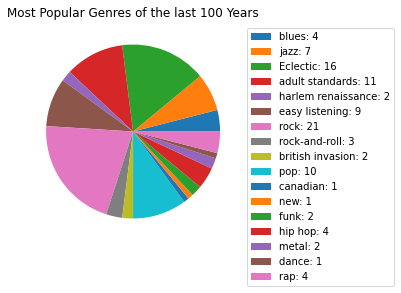

In [137]:
image_output_path = os.path.join("images", "genre", "genrePieChart.png")
genreCounts =  summary_genre["Total"].values #getting the counts for each of the genres
genreNames = summary_genre["Total"].index #get the genre names from the index
pieChartLegendText = [] 

plt.pie(summary_genre["Total"])
plt.title(f"Most Popular Genres of the last 100 Years")

for i in range(len(genreCounts)):#format text for the legend
    pieChartLegendText.append(genreNames[i] + ": ")  
    pieChartLegendText[i] += str(int(genreCounts[i])) #add the counts for each genre as a whole number with no decimal
    
plt.legend(pieChartLegendText,bbox_to_anchor=(1,1))
plt.savefig(image_output_path)
plt.show()

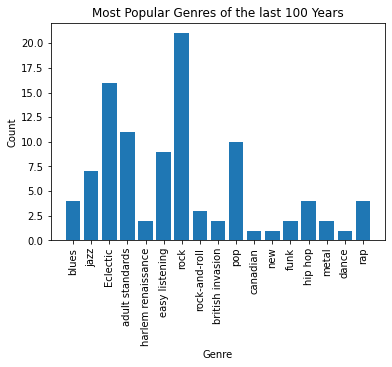

In [138]:
image_output_path = os.path.join("images", "genre", "genreBarChart.png")
plt.bar(genreNames, genreCounts, alpha=1, align="center")
plt.xticks(rotation=90) #rotate the names of the drugs 90 degrees so the text does not run together
plt.title("Most Popular Genres of the last 100 Years")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.savefig(image_output_path)
plt.show()

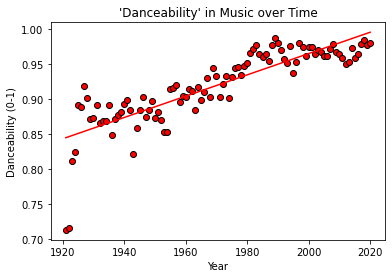

y = 0.0015x + -2.08
r value is 0.710322103601179


count    100.000000
mean       0.920190
std        0.052432
min        0.713000
25%        0.888000
50%        0.925500
75%        0.964000
max        0.988000
Name: danceability_x, dtype: float64

In [109]:
# From "popularity" file, edited to categorize by maximum established parameters
#groupby years

image_output_path = os.path.join("images", "danceability.png")

max_danceability = parameter_df.groupby(["year"])["danceability_x"].max()
max_danceability = max_danceability.reset_index()

year_by_dan = max_danceability.merge(parameter_df,on=["year","danceability_x"],how = "left")
year_by_dan

max_danceability_series = pd.Series(max_danceability["year"])
slopemd, interceptmd, rvaluemd, pvaluemd, stderrmd = linregress(max_danceability_series, max_danceability["danceability_x"])
rmd = max_danceability_series* slopemd + interceptmd
line_eq_md = "y = " + str(round(slopemd,4)) + "x + " + str(round(interceptmd,2))
plt.scatter(max_danceability_series,max_danceability["danceability_x"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_danceability_series,rmd,"r-")
plt.title("'Danceability' in Music over Time")
plt.xlabel("Year")
plt.ylabel("Danceability (0-1)") 
plt.savefig(image_output_path)
plt.show()
print(line_eq_md)
print("r value is " + str(rvaluemd**2))
max_danceability["danceability_x"].describe()

In [110]:
#there is a positive correlation in danceability and time; danceability in music increases over time
stats.f_oneway(max_danceability_series, max_danceability["danceability_x"])
#since pvalue < .05, we reject null hypothesis; data is statistically significant towards hypothesis

F_onewayResult(statistic=460898.84639719024, pvalue=0.0)

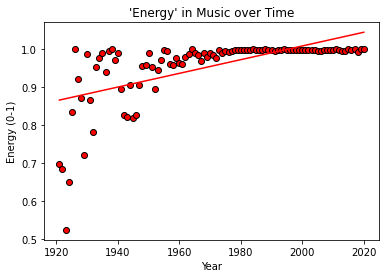

y = 0.0018x + -2.6
r value is 0.3734374615039181


count    100.000000
mean       0.955650
std        0.085545
min        0.525000
25%        0.961500
50%        0.995000
75%        0.998000
max        1.000000
Name: energy_x, dtype: float64

In [111]:
image_output_path = os.path.join("images", "energy.png")

max_energy = parameter_df.groupby(["year"])["energy_x"].max()
max_energy = max_energy.reset_index()

year_by_energy = max_energy.merge(parameter_df,on=["year","energy_x"], how = "left")
year_by_energy

max_energy_series = pd.Series(max_energy["year"])
slopeme, interceptme, rvalueme, pvalueme, stderrme = linregress(max_energy_series, max_energy["energy_x"])
rme = max_energy_series* slopeme + interceptme
line_eq_me = "y = " + str(round(slopeme,4)) + "x + " + str(round(interceptme,2))
plt.scatter(max_energy_series,max_energy["energy_x"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_energy_series,rme,"r-")
plt.title("'Energy' in Music over Time")
plt.xlabel("Year")
plt.ylabel("Energy (0-1)") 
plt.savefig(image_output_path)
plt.show()
print(line_eq_me)
print("r value is " + str(rvalueme**2))
max_energy["energy_x"].describe()

In [112]:
#there is a positive correlation in energy over time; energy in music increases over time
stats.f_oneway(max_energy_series, max_energy["energy_x"])
#since pvalue < .05, we reject null hypothesis; data is statistically significant towards hypothesis

F_onewayResult(statistic=460879.7488624511, pvalue=0.0)

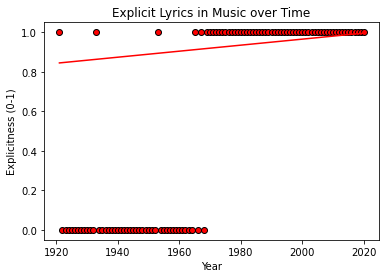

y = 0.0136x + -26.26
r value is 0.6302173669019305


count    100.00000
mean       0.57000
std        0.49757
min        0.00000
25%        0.00000
50%        1.00000
75%        1.00000
max        1.00000
Name: explicit, dtype: float64

In [113]:
image_output_path = os.path.join("images", "explicit.png")

max_explicit = parameter_df.groupby(["year"])["explicit"].max()
max_explicit = max_explicit.reset_index()

year_by_explicit = max_explicit.merge(parameter_df,on=["year", "explicit"],how = "left")
year_by_explicit

max_explicit_series = pd.Series(max_explicit["year"])
slopemex, interceptmex, rvaluemex, pvaluemex, stderrmex = linregress(max_explicit_series, max_explicit["explicit"])
rmex = max_explicit_series* slopemex + interceptmex
line_eq_mex = "y = " + str(round(slopemex,4)) + "x + " + str(round(interceptmex,2))
plt.scatter(max_explicit_series,max_explicit["explicit"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_explicit_series,rmd,"r-")
plt.title("Explicit Lyrics in Music over Time")
plt.xlabel("Year")
plt.ylabel("Explicitness (0-1)") 
plt.savefig(image_output_path)
plt.show()
print(line_eq_mex)
print("r value is " + str(rvaluemex**2))
max_explicit["explicit"].describe()

In [114]:
#there is a positive correlation in explicitness over time; explicit lyrics in music increases over time
stats.f_oneway(max_explicit_series, max_explicit["explicit"])
#since pvalue < .05, we reject null hypothesis; data is statistically significant towards hypothesis

F_onewayResult(statistic=460928.6800667982, pvalue=0.0)

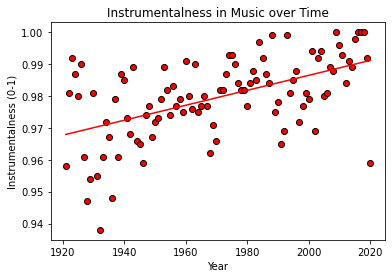

y = 0.0002x + 0.52
r value is 0.28331699741418276


count    100.000000
mean       0.979560
std        0.012787
min        0.938000
25%        0.972750
50%        0.981000
75%        0.989000
max        1.000000
Name: instrumentalness_x, dtype: float64

In [115]:
image_output_path = os.path.join("images", "Instrumentalness.png")

max_instrumental = parameter_df.groupby(["year"])["instrumentalness_x"].max()
max_instrumental = max_instrumental.reset_index()

year_by_ins = max_instrumental.merge(parameter_df,on=["year","instrumentalness_x"])
year_by_ins

max_instrumental_series = pd.Series(max_instrumental["year"])
slopemi, interceptmi, rvaluemi, pvaluemi, stderrmi = linregress(max_instrumental_series, max_instrumental["instrumentalness_x"])
rmi = max_instrumental_series* slopemi + interceptmi
line_eq_mi = "y = " + str(round(slopemi,4)) + "x + " + str(round(interceptmi,2))
plt.scatter(max_instrumental_series,max_instrumental["instrumentalness_x"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_instrumental_series,rmi,"r-")
plt.title("Instrumentalness in Music over Time")
plt.xlabel("Year")
plt.ylabel("Instrumentalness (0-1)") 
plt.savefig(image_output_path)
plt.show()
print(line_eq_mi)
print("r value is " + str(rvaluemi**2))
max_instrumental["instrumentalness_x"].describe()

In [116]:
#there is a positive correlation in instrumentalness over time; instrumentalness in music increases over time
stats.f_oneway(max_instrumental_series, max_instrumental["instrumentalness_x"])
#since pvalue < .05, we reject null hypothesis; data is statistically significant towards hypothesis

F_onewayResult(statistic=460872.4764410479, pvalue=0.0)

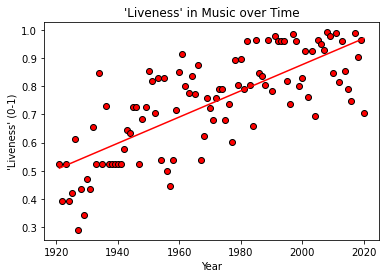

y = 0.0046x + -8.4
r value is 0.5772873604335793


count    100.000000
mean       0.739499
std        0.177181
min        0.291000
25%        0.609883
50%        0.774411
75%        0.860750
max        0.991000
Name: liveness_y, dtype: float64

In [117]:
image_output_path = os.path.join("images", "Liveness.png")

max_live = parameter_df.groupby(["year"])["liveness_y"].max()
max_live = max_live.reset_index()

year_by_live = max_live.merge(parameter_df,on=["year", "liveness_y"])
year_by_live
max_liveness_series = pd.Series(max_live["year"])
slopeml, interceptml, rvalueml, pvalueml, stderrml = linregress(max_liveness_series, max_live["liveness_y"])
rml = max_liveness_series* slopeml + interceptml
line_eq_ml = "y = " + str(round(slopeml,4)) + "x + " + str(round(interceptml,2))
plt.scatter(max_liveness_series,max_live["liveness_y"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_liveness_series,rml,"r-")
plt.title("'Liveness' in Music over Time")
plt.xlabel("Year")
plt.ylabel("'Liveness' (0-1)") 
plt.savefig(image_output_path)
plt.show()
print(line_eq_ml)
print("r value is " + str(rvalueml**2))
max_live["liveness_y"].describe()

In [118]:
#there is a positive correlation in liveness over time; liveness in music increases over time
stats.f_oneway(max_liveness_series, max_live["liveness_y"])
#since pvalue < .05, we reject null hypothesis; data is statistically significant towards hypothesis

F_onewayResult(statistic=460967.729276968, pvalue=0.0)

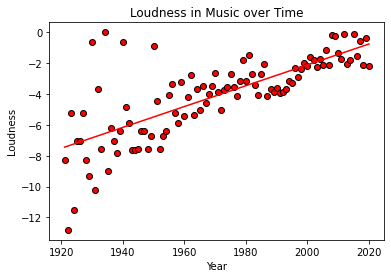

y = 0.0675x + -137.14
r value is 0.5555296782916159


count    100.000000
mean      -4.103212
std        2.627919
min      -12.809250
25%       -5.869125
50%       -3.681639
75%       -2.140475
max        0.001500
Name: loudness_y, dtype: float64

In [119]:
image_output_path = os.path.join("images", "loudness.png")

max_loud = parameter_df.groupby(["year"])["loudness_y"].max()
max_loud = max_loud.reset_index()

year_by_loud = max_loud.merge(parameter_df,on=["year", "loudness_y"])
year_by_loud

max_loudness_series = pd.Series(max_loud["year"])
slopemlo, interceptmlo, rvaluemlo, pvaluemlo, stderrmlo = linregress(max_loudness_series, max_loud["loudness_y"])
rmlo = max_loudness_series* slopemlo + interceptmlo
line_eq_mlo = "y = " + str(round(slopemlo,4)) + "x + " + str(round(interceptmlo,2))
plt.scatter(max_loudness_series,max_loud["loudness_y"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_loudness_series,rmlo,"r-")
plt.title("Loudness in Music over Time")
plt.xlabel("Year")
plt.ylabel("Loudness") 
plt.savefig(image_output_path)
plt.show()
print(line_eq_mlo)
print("r value is " + str(rvaluemlo**2))
max_loud["loudness_y"].describe()

In [120]:
#there is a positive correlation in loudness over time; loudness in music increases over time
stats.f_oneway(max_loudness_series, max_loud["loudness_y"])
#since pvalue < .05, we reject null hypothesis; data is statistically significant towards hypothesis

F_onewayResult(statistic=459484.28262787644, pvalue=0.0)

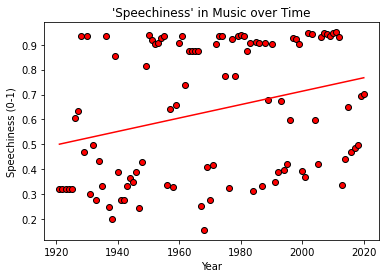

y = 0.0027x + -4.68
r value is 0.08411606517349664


count    100.000000
mean       0.633941
std        0.269507
min        0.156333
25%        0.359417
50%        0.654428
75%        0.914187
max        0.950000
Name: speechiness_y, dtype: float64

In [121]:
image_output_path = os.path.join("images", "Speechiness.png")

max_speech = parameter_df.groupby(["year"])["speechiness_y"].max()
max_speech = max_speech.reset_index()

year_by_speech = max_speech.merge(parameter_df,on=["year","speechiness_y"])
year_by_speech

max_speech_series = pd.Series(max_speech["year"])
slopems, interceptms, rvaluems, pvaluems, stderrms = linregress(max_speech_series, max_speech["speechiness_y"])
rms = max_speech_series* slopems + interceptms
line_eq_ms = "y = " + str(round(slopems,4)) + "x + " + str(round(interceptms,2))
plt.scatter(max_speech_series,max_speech["speechiness_y"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_speech_series,rms,"r-")
plt.title("'Speechiness' in Music over Time")
plt.xlabel("Year")
plt.ylabel("Speechiness (0-1)") 
plt.savefig(image_output_path)
plt.show()
print(line_eq_ms)
print("r value is " + str(rvaluems**2))
max_speech["speechiness_y"].describe()

In [122]:
#there is a negative correlation in speechiness over time; speechiness in music increases over time
stats.f_oneway(max_speech_series, max_speech["speechiness_y"])
#since pvalue < .05, we reject null hypothesis; data is statistically significant towards hypothesis

F_onewayResult(statistic=460994.54871465993, pvalue=0.0)

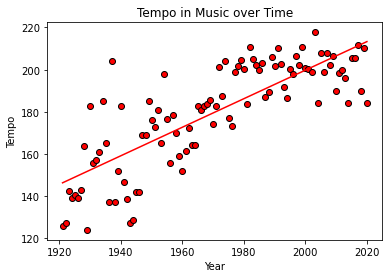

y = 0.6762x + -1152.56
r value is 0.6312991667222639


count    100.000000
mean     179.831245
std       24.689157
min      124.031583
25%      164.315500
50%      184.028500
75%      200.819750
max      217.743000
Name: tempo_y, dtype: float64

In [123]:
image_output_path = os.path.join("images", "tempo.png")

max_temp = parameter_df.groupby(["year"])["tempo_y"].max()
max_temp = max_temp.reset_index()

year_by_temp = max_temp.merge(parameter_df,on=["year","tempo_y"])
year_by_temp

max_tempo_series = pd.Series(max_temp["year"])
slopemt, interceptmt, rvaluemt, pvaluemt, stderrmt = linregress(max_tempo_series, max_temp["tempo_y"])
rmt = max_tempo_series* slopemt + interceptmt
line_eq_mt = "y = " + str(round(slopemt,4)) + "x + " + str(round(interceptmt,2))
plt.scatter(max_tempo_series,max_temp["tempo_y"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_tempo_series,rmt,"r-")
plt.title("Tempo in Music over Time")
plt.xlabel("Year")
plt.ylabel("Tempo") 
plt.savefig(image_output_path)
plt.show()
print(line_eq_mt)
print("r value is " + str(rvaluemt**2))
max_temp["tempo_y"].describe()

In [124]:
#there is a positive correlation in tempo in music over time; tempo in music increases over time
stats.f_oneway(max_tempo_series, max_temp["tempo_y"])
#since pvalue < .05, we reject null hypothesis; data is statistically significant towards hypothesis

F_onewayResult(statistic=220951.4810705294, pvalue=9.981572658162481e-304)

In [125]:
## compare relative trends;

## danceability r^2 = .6006

## energy r^2= .2656

## explicitness r^2  =.2484

## instrumentalness r^2 =.0814

## liveness r^2 = .3108

## loudness r^2 = .4675

## speechiness r^2 = .0021

## tempo r^2 = .2383



In [126]:
## chi square analysis: expected vs. observed?
## expected = .20398 (average r^2 values)
observed_data = pd.Series([.6006, .2656, .2484, .0814, .3108, .4675, .0021, .2383], index=["danceability","energy","explicitness","instrumentalness","liveness","loudness","speechiness","tempo"])
observed_data.describe()#retrieves mean for "expected" values in chi square analysis



count    8.000000
mean     0.276838
std      0.192140
min      0.002100
25%      0.199075
50%      0.257000
75%      0.349975
max      0.600600
dtype: float64

In [127]:
music_df = pd.DataFrame([observed_data]).T
music_df[1] = 0.276838
music_df.columns = ["observed","expected"]
music_df



,observed,expected
danceability,0.6006,0.276838
energy,0.2656,0.276838
explicitness,0.2484,0.276838
instrumentalness,0.0814,0.276838
liveness,0.3108,0.276838
loudness,0.4675,0.276838
speechiness,0.0021,0.276838
tempo,0.2383,0.276838


In [128]:
#returns critical value for music_df needed in chi square analysis
stats.t.ppf(q=0.95, df=7)

1.894578605061305

In [129]:
stats.chisquare(music_df["observed"], music_df["expected"])
#pvalue is greater than .05; pvalue analysis reveals trends are not statistically significant

Power_divergenceResult(statistic=0.9334860776049533, pvalue=0.9958313440881679)

In [130]:
#however, via chisquare analysis, since the statistic value (0.9335) is less then the critical value, relative trends in music parameters
# are statistically significant over time